In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import pylab as pl
import scipy.optimize as opt
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("loan_train.csv")
raw_data.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
raw_data.shape

(346, 10)

In [4]:
raw_data['due_date'] = pd.to_datetime((raw_data['due_date']))
raw_data['effective_date'] = pd.to_datetime(raw_data['effective_date'])
raw_data.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [5]:
raw_data['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

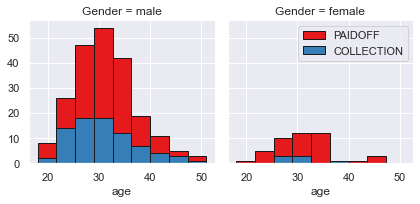

In [6]:
bins = np.linspace(raw_data.age.min(), raw_data.age.max(), 10)
g = sns.FacetGrid(raw_data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [7]:
raw_data.groupby(['Gender'])['loan_status'].value_counts(normalize = True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [8]:
raw_data['Gender'].replace(to_replace = ['male', 'female'], value = [0, 1], inplace = True)

In [9]:
gender_converted_data = raw_data
gender_converted_data.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


In [10]:
gender_converted_data.groupby(['education'])['loan_status'].value_counts(normalize = True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [11]:
features = gender_converted_data[['Principal','terms','age','Gender']]
features = pd.concat([features, pd.get_dummies(gender_converted_data['education'])], axis = 1)
features.drop(['Master or Above'], axis = 1, inplace = True)
features.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,0,0,0,1


In [12]:
X = features

In [13]:
Y = gender_converted_data['loan_status']

In [14]:
X = preprocessing.StandardScaler().fit_transform(X)
X

array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679]])

### K MEANS 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 7) (276,)
Test set: (70, 7) (70,)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score

In [17]:
mean_acc = np.zeros(9)
std_acc = np.zeros(9)
confusion_matrix = []
for i in range (1, 10):
    k_nn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    yhat = k_nn.predict(X_test)
    mean_acc[i - 1] = metrics.accuracy_score(y_test, yhat)
    std_acc[i - 1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.55714286, 0.47142857, 0.68571429, 0.61428571, 0.77142857,
       0.7       , 0.77142857, 0.71428571, 0.75714286])

In [18]:
from sklearn.tree import DecisionTreeClassifier
loan_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
loan_tree.fit(X_train, y_train)
print(loan_tree)

DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [19]:
pred_tree = loan_tree.predict(X_test)
pred_tree

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [20]:
metrics.accuracy_score(y_test, pred_tree)

0.7857142857142857

In [21]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [22]:
dot_data = StringIO()
file_name = "LoanTree.png"
features_names = raw_data.columns[2:9]
targetNames = raw_data["loan_status"].unique().tolist()
out = tree.export_graphviz(loan_tree, feature_names=features_names, out_file=dot_data, class_names=np.unique(y_train), filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(file_name)
img = mpimg.imread(file_name)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

InvocationException: GraphViz's executables not found

### SUPPORT VECTOR MACHINE

In [23]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [29]:
y_svm_rbf = clf.predict(X_test)
y_svm_rbf

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [26]:
def plot_confusion_matrix(
        cm,
        classes,
        normalize = False,
        title = 'Confusion Matrix',
        cmap=plt.cm.Blues
                            ):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix : ")
    else:
        print("Confusion Matrix, without normalization")
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
cm = confusion_matrix(y_test, y_svm_rbf, labels=[2,4])
np.set_printoptions(precision=2)

print(classification_report(y_test, y_svm_rbf))

plt.figure()
plot_confusion_matrix(cm, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

TypeError: '<' not supported between instances of 'int' and 'str'